In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import plotly as ply

In [2]:
df=pd.read_csv("/kaggle/input/sf-crime/train.csv.zip")
df.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [3]:
df=df.drop(["Descript","Resolution","Address","PdDistrict","DayOfWeek"],axis=1)

In [4]:
# Sadece Yılı göstermesi için:
a=lambda x:(x["Dates"].split("-"))[0]
df["Dates"]=df.apply(a,axis=1)
df["Dates"].value_counts()

2013    75606
2014    74766
2003    73902
2004    73422
2012    71731
2005    70779
2008    70174
2006    69909
2009    69000
2007    68015
2011    66619
2010    66542
2015    27584
Name: Dates, dtype: int64

In [5]:
df=df[(df["Dates"]=="2015")]
df.head()

Dates        Category           X          Y
0  2015        WARRANTS -122.425892  37.774599
1  2015  OTHER OFFENSES -122.425892  37.774599
2  2015  OTHER OFFENSES -122.424363  37.800414
3  2015   LARCENY/THEFT -122.426995  37.800873
4  2015   LARCENY/THEFT -122.438738  37.771541

In [6]:
sc=MinMaxScaler()
sc.fit(df[["X"]])
df["X_scale"]=sc.transform(df[["X"]])
sc.fit(df[["Y"]])
df["Y_scale"]=sc.transform(df[["Y"]])
df.head()

Dates        Category           X          Y   X_scale   Y_scale
0  2015        WARRANTS -122.425892  37.774599  0.592601  0.594736
1  2015  OTHER OFFENSES -122.425892  37.774599  0.592601  0.594736
2  2015  OTHER OFFENSES -122.424363  37.800414  0.602925  0.825563
3  2015   LARCENY/THEFT -122.426995  37.800873  0.585148  0.829661
4  2015   LARCENY/THEFT -122.438738  37.771541  0.505849  0.567399

In [7]:
km=KMeans(n_clusters=2)
best=[]
for i in range(1,15):
    km1=KMeans(n_clusters=i)
    km1.fit(df[["X_scale"]],df[["Y_scale"]])
    best.append(km1.inertia_)

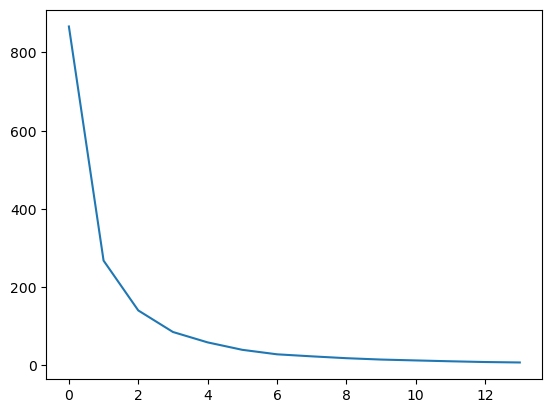

In [8]:
plt.plot(best);

In [9]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[["X_scale","Y_scale"]])

In [10]:
df["cluster"]=y_pred
df.cluster.value_counts()

1    17256
0     6186
2     4142
Name: cluster, dtype: int64

In [11]:
import plotly.express as px
figure=px.scatter_mapbox(df,lat="Y",lon="X",
                       center=dict(lat=37.8,lon=-122.4),
                        zoom=9,
                        title="Suç Haritası",
                        width=1100,
                        height=700,
                        hover_data=["cluster","Category","X","Y"],
                        color="cluster",
                       mapbox_style="stamen-terrain")

In [12]:
figure.show()

In [13]:
import plotly.express as px
figure1=px.scatter_mapbox(df,lat="Y",lon="X",
                       center=dict(lat=37.8,lon=-122.4),
                        zoom=9,
                        title="Suç Haritası",
                        width=1100,
                        height=700,
                        hover_data=["cluster","Category","X","Y"],
                        color="cluster",
                       mapbox_style="open-street-map")

In [14]:
figure1